<a href="https://colab.research.google.com/github/ItSick/AI-EDA/blob/main/Copy_of_regression_int.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#NOTE: THE FILE /content/train.csv IS BEING DELETE WHILE OFFLINE


**Regression Analysis Task**

## **Practical Kaggle Project: House Prices - Advanced Regression Techniques**

- Dataset: [House Prices - Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)
- Objective: Predict house prices using regression models.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestRegressor
import scipy.stats as stats

In [ ]:
house_pricing = pd.read_csv('/content/train.csv')
house_pricing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000



### **EDA Questions:**

1. What is the distribution of the target variable (SalePrice)?
2. How do numerical features like ‘GrLivArea’ and ‘TotalBsmtSF’ correlate with ‘SalePrice’?
3. Are there missing values in the dataset? Which features are affected?
4. How do categorical variables like ‘Neighborhood’ and ‘HouseStyle’ impact ‘SalePrice’?
5. Is there evidence of multicollinearity among predictors?


#What is the distribution of the target variable (SalePrice)?


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


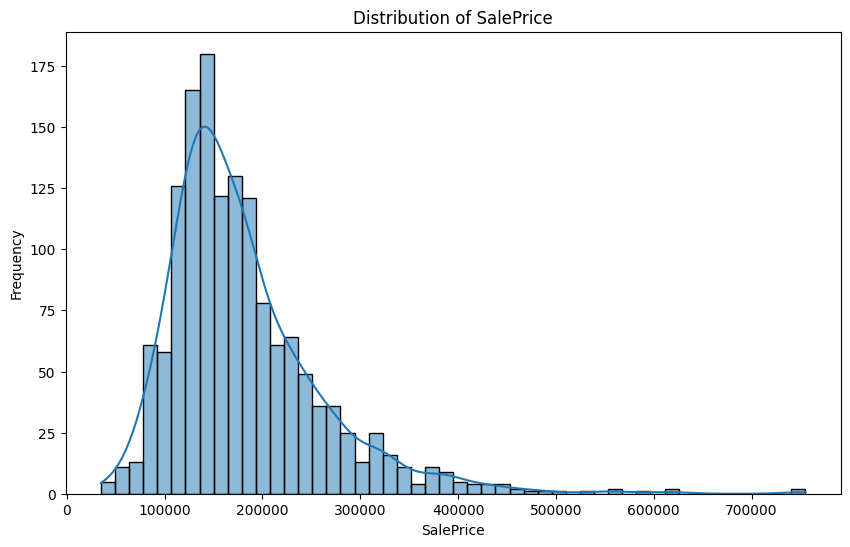

Skewness: 1.880940746034036


In [ ]:
def explore_target_distribution(df, feature_target):
    print(df[feature_target].describe())

    plt.figure(figsize=(10,6))
    sns.histplot(df[feature_target], bins=50, kde=True)
    plt.xlabel(feature_target)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {feature_target}")
    plt.show()

    print(f"Skewness: {skew(df[feature_target])}")

explore_target_distribution(house_pricing,'SalePrice')

#Reuseable Functions

In [ ]:
def actual_vs_predict_scatter_plot(y_true, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, color='blue', alpha=0.6, label='Actual vs Predicted')
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)],
             color='red', linestyle='--', label='Perfect Prediction')
    plt.title(f'{title}: Actual vs Predicted Values')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.show()

def actual_vs_predict_histogram_plot(y_true, y_pred, title):
    bins = np.linspace(min(y_true.min(), y_pred.min()),
                    max(y_true.max(), y_pred.max()), 30)

    plt.figure(figsize=(12, 6))
    plt.hist([y_true, y_pred], bins=bins,
             label=['Actual Values', 'Predicted Values'],
             alpha=0.7, color=['blue', 'red'])
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(f'{title}: Histogram of Actual vs Predicted Values')
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_qq(residuals):
    plt.figure(figsize=(8, 6))
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title('Q-Q Plot for Residuals')
    plt.show()


def evaluate_model_print_and_plot(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"{model_name} - Performance Metrics:")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R² Score: {r2:.4f}")

    residuals = y_true - y_pred

    actual_vs_predict_scatter_plot(y_true, y_pred, model_name)
    actual_vs_predict_histogram_plot(y_true, y_pred, model_name)
    plot_qq(residuals)

    return mse, rmse, r2


def train_evaluate_model(X_train, X_test, y_train, y_test, model, check_accuracy_and_confusion):
    model_name = model.__class__.__name__
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse, rmse, r2 = evaluate_model_print_and_plot(y_test, y_pred, model_name)
    if check_accuracy_and_confusion:
      accuracy = accuracy_score(y_test, y_pred)
      conf_matrix = confusion_matrix(y_test, y_pred)

      print(f"////////////////Accuracy////////////////////////////")
      print(f"Accuracy: {accuracy}")
      print(f"////////////////Accuracy////////////////////////////")
      print(f"////////////////Confusion Matrix////////////////////")
      print(f"Confusion Matrix:\n{conf_matrix}")
      print(f"////////////////Confusion Matrix////////////////////")



#How do numerical features like ‘GrLivArea’ and ‘TotalBsmtSF’ correlate with ‘SalePrice’?

             SalePrice  GrLivArea  TotalBsmtSF
SalePrice     1.000000   0.708624     0.613581
GrLivArea     0.708624   1.000000     0.454868
TotalBsmtSF   0.613581   0.454868     1.000000


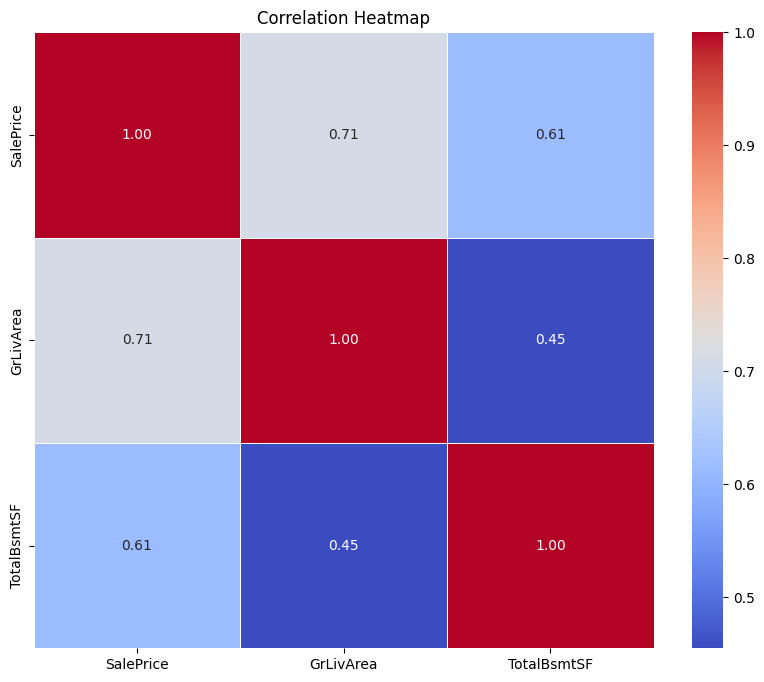

In [ ]:
def explore_correlations(df, features):
    correlations = df[features].corr()
    print(correlations)

    plt.figure(figsize=(10,8))
    plt.title("Correlation Heatmap")
    sns.heatmap(correlations, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
    plt.show()

explore_correlations(house_pricing,['SalePrice', 'GrLivArea', 'TotalBsmtSF'])
#GrLivArea: Above grade (ground) living area square feet
#TotalBsmtSF: Total square feet of basement area

#Are there missing values in the dataset? Which features are affected?


In [ ]:
def check_missing_values(df):
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0]
    print(missing_values.sort_values(ascending=False))

check_missing_values(house_pricing)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


#How do categorical variables like ‘Neighborhood’ and ‘HouseStyle’ impact ‘SalePrice’?

In [ ]:

neighborhood_prices = house_pricing.groupby("Neighborhood")["SalePrice"].mean().sort_values(ascending=False)
print(neighborhood_prices)
print('____________________________________________')
housestyle_prices = house_pricing.groupby("HouseStyle")["SalePrice"].mean().sort_values(ascending=False)
print(housestyle_prices)


Neighborhood
NoRidge    335295.317073
NridgHt    316270.623377
StoneBr    310499.000000
Timber     242247.447368
Veenker    238772.727273
Somerst    225379.837209
ClearCr    212565.428571
Crawfor    210624.725490
CollgCr    197965.773333
Blmngtn    194870.882353
Gilbert    192854.506329
NWAmes     189050.068493
SawyerW    186555.796610
Mitchel    156270.122449
NAmes      145847.080000
NPkVill    142694.444444
SWISU      142591.360000
Blueste    137500.000000
Sawyer     136793.135135
OldTown    128225.300885
Edwards    128219.700000
BrkSide    124834.051724
BrDale     104493.750000
IDOTRR     100123.783784
MeadowV     98576.470588
Name: SalePrice, dtype: float64
____________________________________________
HouseStyle
2.5Fin    220000.000000
2Story    210051.764045
1Story    175985.477961
SLvl      166703.384615
2.5Unf    157354.545455
1.5Fin    143116.740260
SFoyer    135074.486486
1.5Unf    110150.000000
Name: SalePrice, dtype: float64


<ipython-input-43-0a9c1d18c1bb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=x, y=y, data=data, palette="Set3")


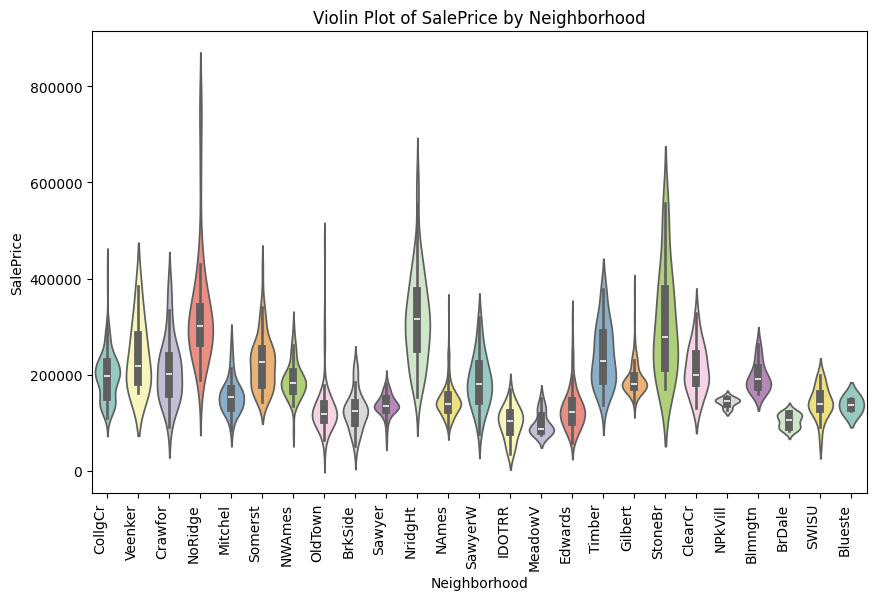

<ipython-input-43-0a9c1d18c1bb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=x, y=y, data=data, palette="Set3")


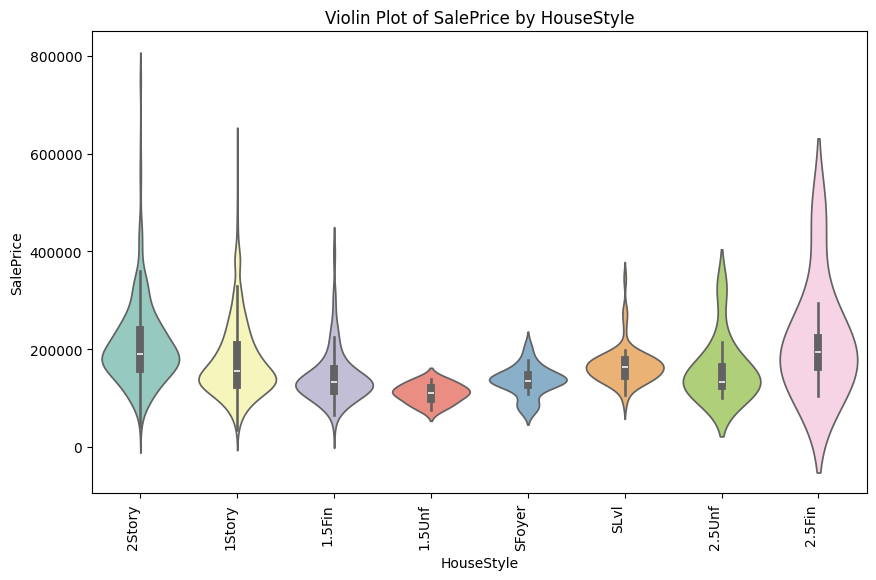

In [ ]:
def violin_plot(x, y, data):
    plt.figure(figsize=(10, 6))
    sns.violinplot(x=x, y=y, data=data, palette="Set3")

    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f"Violin Plot of {y} by {x}")
    plt.xticks(rotation=90, ha='right')
    plt.show()

violin_plot("Neighborhood", "SalePrice", house_pricing)
violin_plot("HouseStyle", "SalePrice", house_pricing)

# type check befor and after conversion

In [ ]:
house_pricing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
house_pricing = house_pricing.convert_dtypes()
house_pricing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   Int64 
 1   MSSubClass     1460 non-null   Int64 
 2   MSZoning       1460 non-null   string
 3   LotFrontage    1201 non-null   Int64 
 4   LotArea        1460 non-null   Int64 
 5   Street         1460 non-null   string
 6   Alley          91 non-null     string
 7   LotShape       1460 non-null   string
 8   LandContour    1460 non-null   string
 9   Utilities      1460 non-null   string
 10  LotConfig      1460 non-null   string
 11  LandSlope      1460 non-null   string
 12  Neighborhood   1460 non-null   string
 13  Condition1     1460 non-null   string
 14  Condition2     1460 non-null   string
 15  BldgType       1460 non-null   string
 16  HouseStyle     1460 non-null   string
 17  OverallQual    1460 non-null   Int64 
 18  OverallCond    1460 non-null

#**Is** there evidence of multicollinearity among predictors?

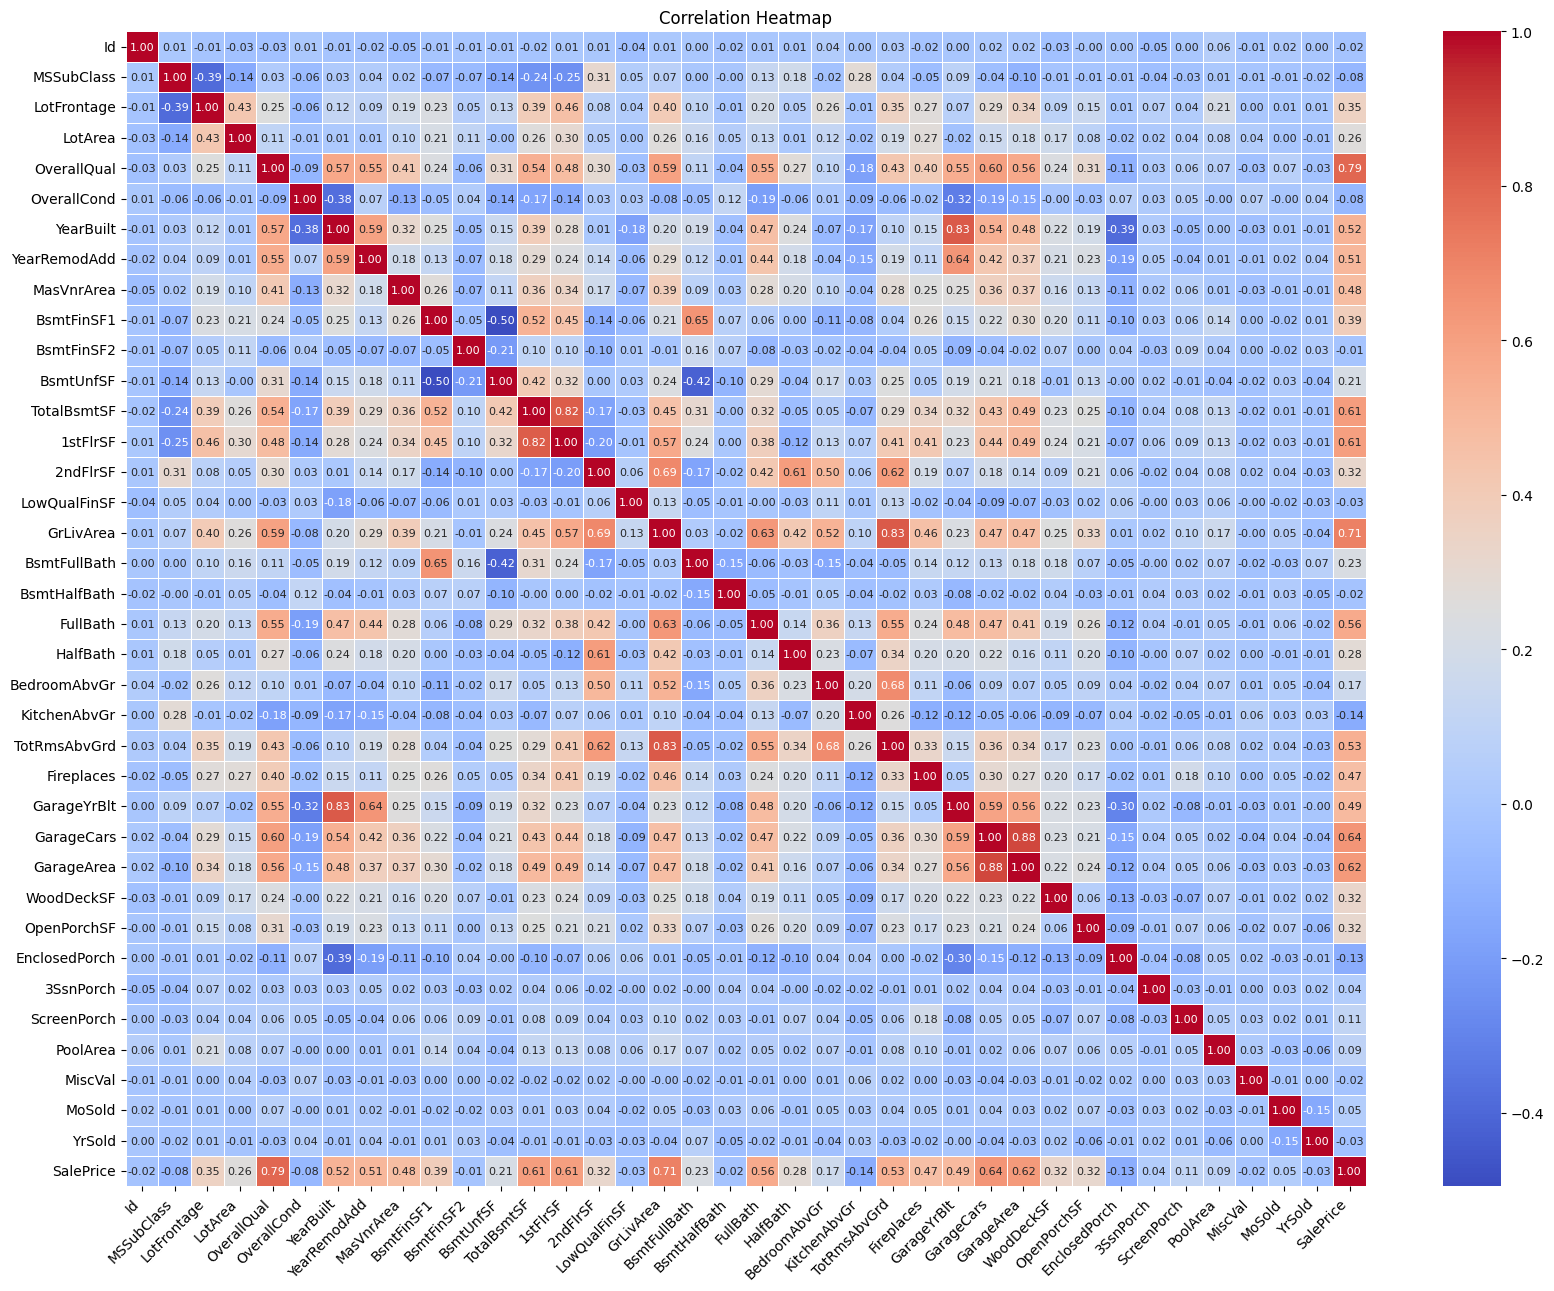

In [ ]:
corr_matrix = house_pricing.select_dtypes(include=['number']).corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, annot_kws={"size": 8})
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.title("Correlation Heatmap")
plt.show()

#searching for strong correlations(correlation bigger the 0.80


In [ ]:

corr_matrix = house_pricing.select_dtypes(include=['number']).corr()
threshold = 0.80
strong_corr = corr_matrix.abs().unstack().sort_values(ascending=False)
strong_corr = strong_corr[strong_corr < 1]
strong_corr_pairs = strong_corr[strong_corr > threshold]
print(strong_corr_pairs)
#GarageCars: Size of garage in car capacity
#GarageArea: Size of garage in square feet

GarageArea    GarageCars      0.882475
GarageCars    GarageArea      0.882475
GarageYrBlt   YearBuilt       0.825667
YearBuilt     GarageYrBlt     0.825667
TotRmsAbvGrd  GrLivArea       0.825489
GrLivArea     TotRmsAbvGrd    0.825489
1stFlrSF      TotalBsmtSF     0.819530
TotalBsmtSF   1stFlrSF        0.819530
dtype: float64


# Feature that suggest multicollinearity
<table>
  <tr>
    <th>Feature 1</th>
    <th>Feature 2</th>
    <th>Corr</th>
  </tr>
  <tr>
    <td>GarageArea</td>
    <td>GarageCars</td>
    <td>0.88</td>
  </tr>
  <tr>
    <td>GarageYrBlt</td>
    <td>YearBuilt</td>
    <td>0.83</td>
  </tr>
  <tr>
    <td>TotRmsAbvGrd</td>
    <td>GrLivArea</td>
    <td>0.83</td>
  </tr>
  <tr>
    <td>1stFlrSF</td>
    <td>TotalBsmtSF</td>
    <td>0.82</td>
  </tr>
</table>


### **Modeling Instructions:**

- Split data into training and testing sets.
- Fit a multiple linear regression model.
- Evaluate using R² and RMSE.
- Test for multicollinearity using VIF.
- Include interaction terms and dummy variables.


#check for missing value


In [ ]:
missing_counts = house_pricing.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]
missing_counts = missing_counts.sort_values(ascending=False)
print(missing_counts)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


#Drop missing values columns


In [ ]:
house_features_droped = house_pricing.drop(columns=["SalePrice", "Id","PoolQC","Fence","MiscFeature","Alley",
                                                   "MasVnrType","FireplaceQu","LotFrontage","GarageType","GarageYrBlt",
                                                   "GarageFinish","GarageQual","GarageCond","BsmtExposure","BsmtFinType2",
                                                   "BsmtQual","BsmtCond","BsmtFinType1","MasVnrArea","Electrical"])


# convert to categorial(dummy variables)


In [ ]:
house_prices = house_pricing["SalePrice"]
encoded_features = pd.get_dummies(house_features_droped, drop_first=True)
imputer = SimpleImputer(strategy="mean")
complete_features = pd.DataFrame(imputer.fit_transform(encoded_features), columns=encoded_features.columns)

#Split data into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(complete_features, house_prices, test_size=0.2, random_state=42)

#Fit a multiple linear regression model.
##+Evaluate using R² and RMSE.


LinearRegression - Performance Metrics:
Mean Squared Error (MSE): 2514067069.89
Root Mean Squared Error (RMSE): 50140.47
R² Score: 0.6722


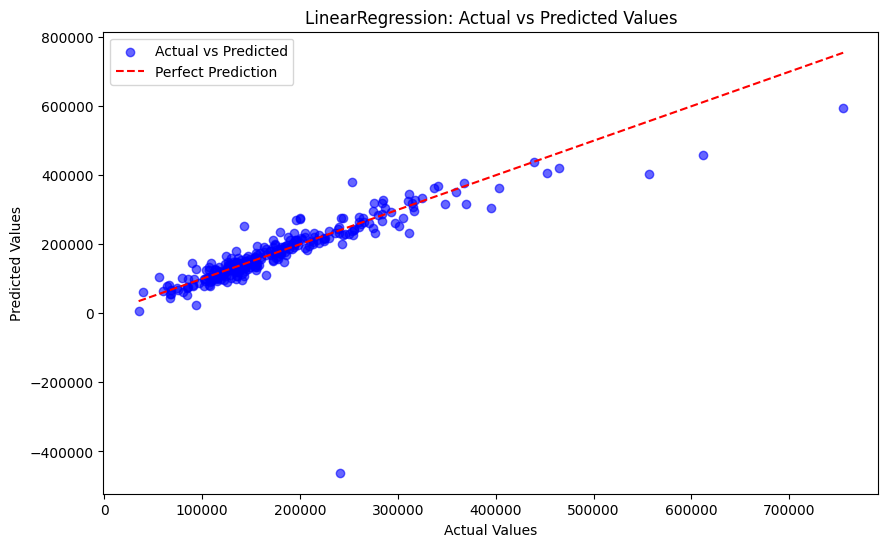

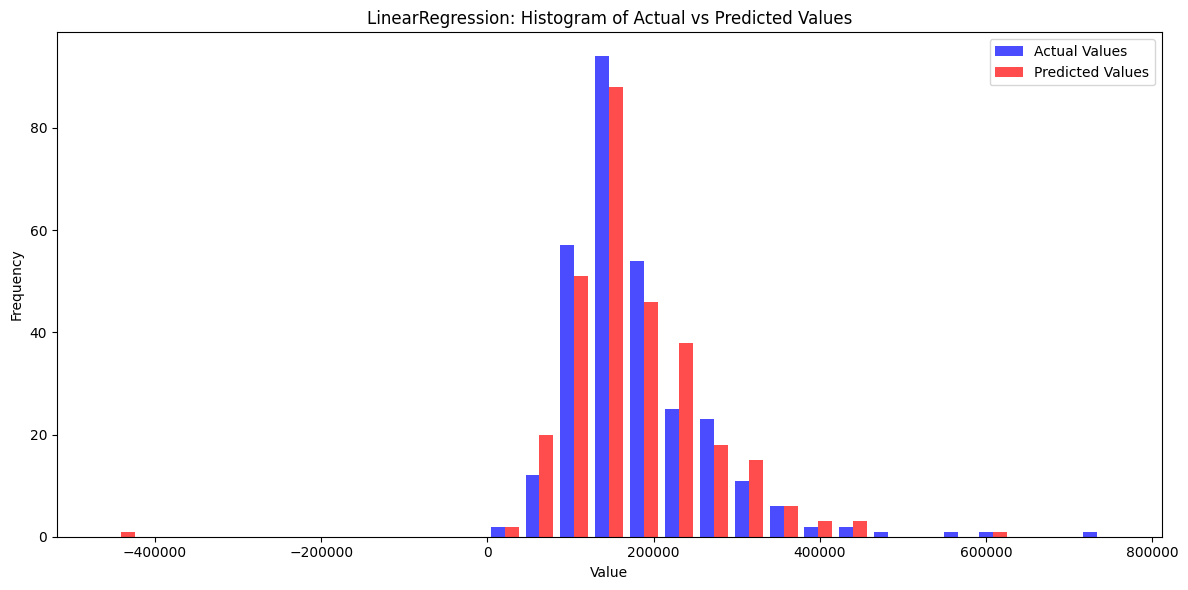

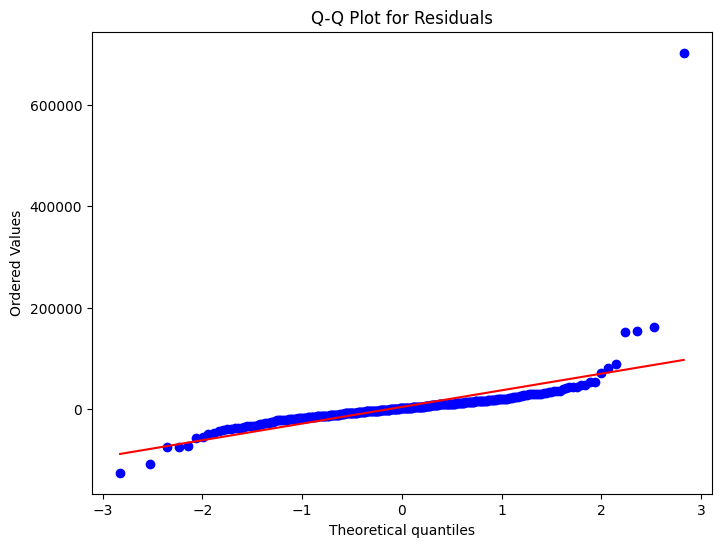

In [ ]:
lr_model = LinearRegression()
train_evaluate_model(X_train, X_test, y_train, y_test,lr_model,False)



#Test for multicollinearity using VIF.


In [ ]:
vif_threshold = 10
vif_data = pd.DataFrame()
vif_data["Feature"] = complete_features.columns
vif_data["VIF"] = [variance_inflation_factor(complete_features.values, i) for i in range(complete_features.shape[1])]
#print("Variance Inflation Factor (VIF) Values:\n", vif_data.sort_values(by="VIF", ascending=False))

high_vif_features = vif_data[vif_data["VIF"] > vif_threshold]
#print("Features with High Multicollinearity (Consider Removing):\n", high_vif_features.sort_values(by="VIF", ascending=False))
inf_vif_features = vif_data[vif_data["VIF"] == float('inf')]
high_vif_features = vif_data[(vif_data["VIF"] > 10) & (vif_data["VIF"] != float('inf'))]

print("Features with Perfect Multicollinearity :\n", inf_vif_features)
print("__________________________________________________________________________")
print("\nFeatures with High Multicollinearity :\n", high_vif_features.sort_values(by="VIF", ascending=False))


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Features with Perfect Multicollinearity :
                 Feature  VIF
6            BsmtFinSF1  inf
7            BsmtFinSF2  inf
8             BsmtUnfSF  inf
9           TotalBsmtSF  inf
10             1stFlrSF  inf
11             2ndFlrSF  inf
12         LowQualFinSF  inf
13            GrLivArea  inf
116  Exterior1st_CBlock  inf
130  Exterior2nd_CBlock  inf
__________________________________________________________________________

Features with High Multicollinearity :
                   Feature           VIF
32                 YrSold  80173.015161
4               YearBuilt  52198.240717
5            YearRemodAdd  30523.253525
106      RoofMatl_CompShg   2682.039640
154          Heating_GasA   1595.565865
..                    ...           ...
71   Neighborhood_Somerst     12.010362
111      RoofMatl_WdShake     11.588301
57   Neighborhood_Edwards     11.316734
149     Foundation_CBlock     11.164164
141   Exterior2nd_Wd Shng     10.105421

[64 rows x 2 columns]


#Include interaction terms

In [ ]:
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_interaction = poly.fit_transform(complete_features)
X_interaction_df = pd.DataFrame(X_interaction, columns=poly.get_feature_names_out(complete_features.columns))
X_interaction_df.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleCondition_AdjLand SaleCondition_Alloca,SaleCondition_AdjLand SaleCondition_Family,SaleCondition_AdjLand SaleCondition_Normal,SaleCondition_AdjLand SaleCondition_Partial,SaleCondition_Alloca SaleCondition_Family,SaleCondition_Alloca SaleCondition_Normal,SaleCondition_Alloca SaleCondition_Partial,SaleCondition_Family SaleCondition_Normal,SaleCondition_Family SaleCondition_Partial,SaleCondition_Normal SaleCondition_Partial
0,60.0,8450.0,7.0,5.0,2003.0,2003.0,706.0,0.0,150.0,856.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20.0,9600.0,6.0,8.0,1976.0,1976.0,978.0,0.0,284.0,1262.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,60.0,11250.0,7.0,5.0,2001.0,2002.0,486.0,0.0,434.0,920.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,70.0,9550.0,7.0,5.0,1915.0,1970.0,216.0,0.0,540.0,756.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,60.0,14260.0,8.0,5.0,2000.0,2000.0,655.0,0.0,490.0,1145.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



### **Hypothesis Testing for Coefficients:**

- **Null Hypothesis (H₀):** Coefficient = 0 (No effect)
- **Alternative Hypothesis (H₁):** Coefficient ≠ 0 (Significant effect)
- **Test:** Compute t-statistic:
  $(t = \frac{\hat{\beta_i}}{SE(\hat{\beta_i})})$
- If p-value < 0.05, reject H₀.

---
###helps determine which features have a statistically significant relationship with the target variable



In [ ]:
X_train_sm = X_train.apply(pd.to_numeric, errors='coerce')
X_test_sm = X_test.apply(pd.to_numeric, errors='coerce')

X_train_sm = X_train_sm.astype(float)
X_test_sm = X_test_sm.astype(float)

X_train_sm = sm.add_constant(X_train_sm)
X_test_sm = sm.add_constant(X_test_sm)
#Ordinary Least Square
model_sm = sm.OLS(y_train, X_train_sm).fit()

print(model_sm.summary())



                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     63.95
Date:                Thu, 27 Mar 2025   Prob (F-statistic):               0.00
Time:                        16:30:53   Log-Likelihood:                -13306.
No. Observations:                1168   AIC:                         2.698e+04
Df Residuals:                     983   BIC:                         2.792e+04
Df Model:                         184                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -1.52e+


## Summary**

- Regression analysis is a powerful tool for prediction and inference.
- Assumptions should be checked to ensure valid results.
- Multicollinearity, interaction terms, and dummy variables improve model accuracy.
- Kaggle project allows hands-on application of regression techniques.



***********************************
# END OF LINEAR REGRESSION
***********************************

---

**Next Steps:**

- Work on the Kaggle dataset.
- Implement dummy variables and interaction terms.
- Conduct hypothesis tests for coefficients.

## ** Jupyter Notebook Instructions for Decision Trees and Random Forests**

### ** Train a Decision Tree**
1. Import `DecisionTreeRegressor` from `sklearn.tree`.



2. Split the dataset into training and testing sets.


- already splited (line 33)

3. Train a decision tree model.
- &
4. Evaluate performance using RMSE and R².


DecisionTreeRegressor - Performance Metrics:
Mean Squared Error (MSE): 1612414302.06
Root Mean Squared Error (RMSE): 40154.88
R² Score: 0.7898


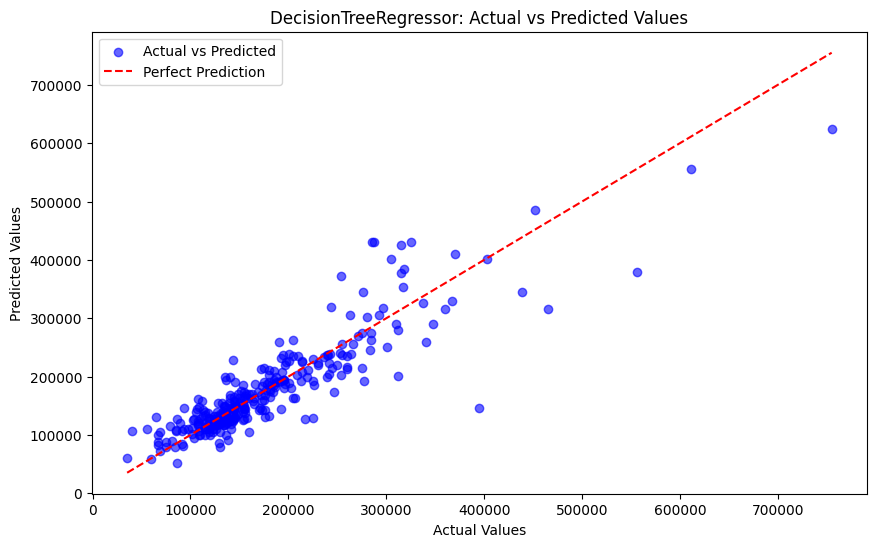

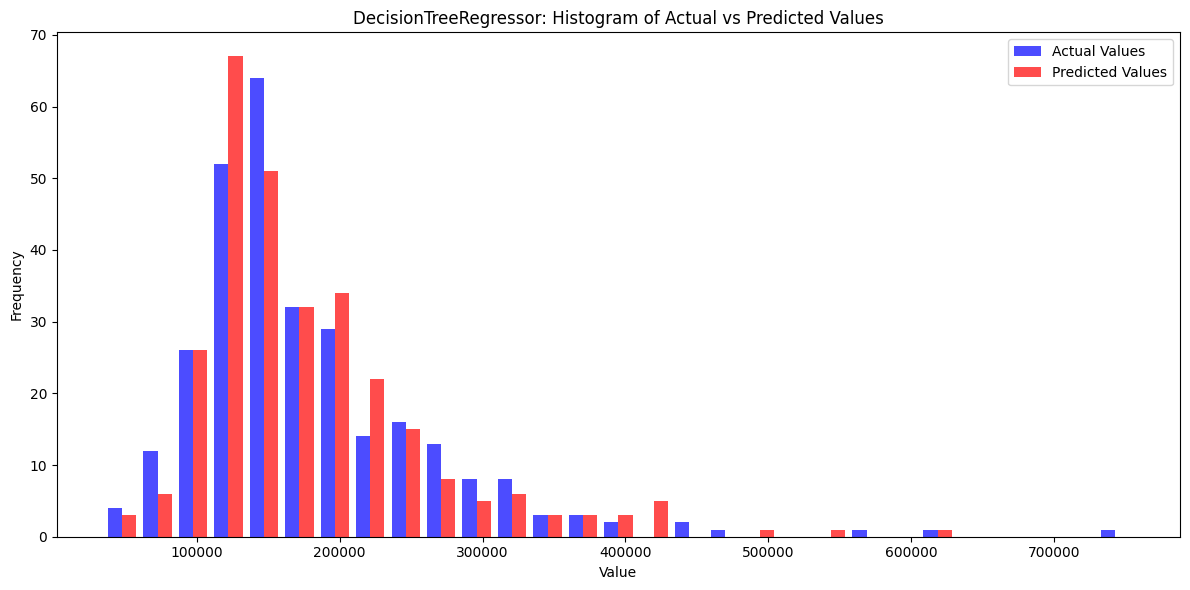

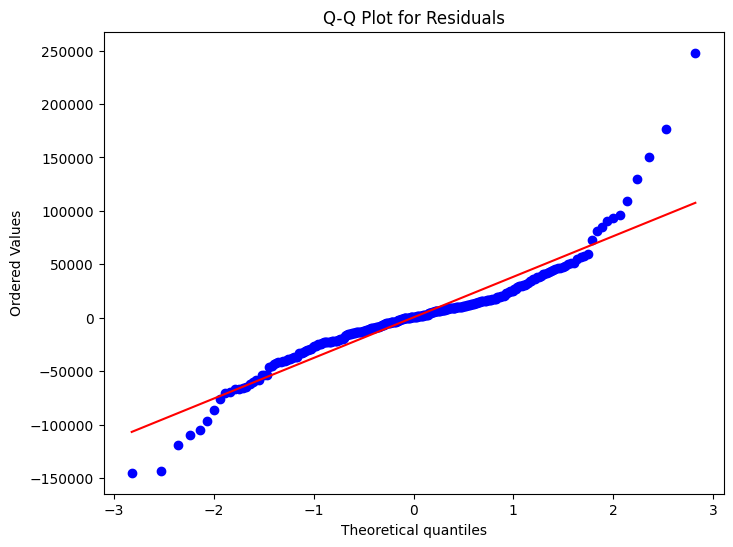

In [ ]:
decision_tree_model = DecisionTreeRegressor(random_state=42)
train_evaluate_model(X_train, X_test, y_train, y_test,decision_tree_model,False)


DecisionTreeClassifier - Performance Metrics:
Mean Squared Error (MSE): 3390448642.50
Root Mean Squared Error (RMSE): 58227.56
R² Score: 0.5580


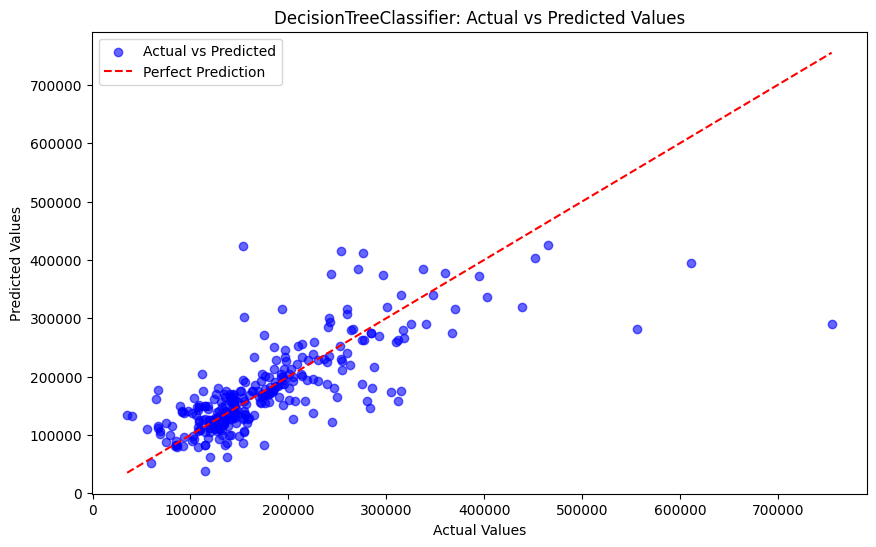

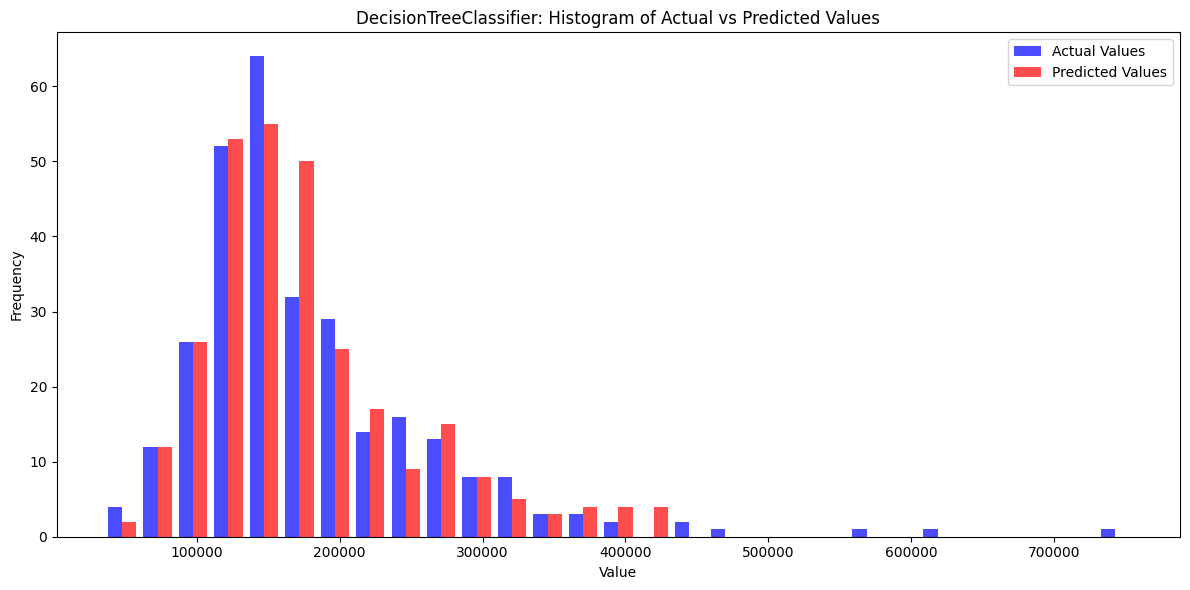

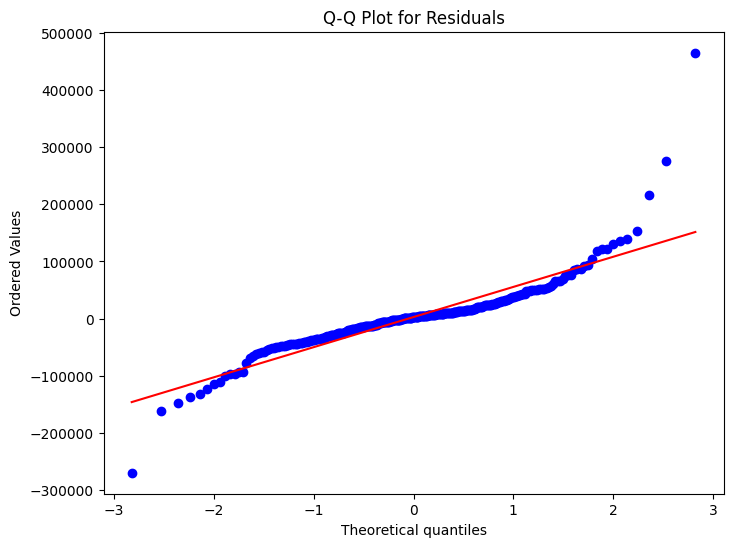

////////////////Accuracy////////////////////////////
Accuracy: 0.0
////////////////Accuracy////////////////////////////
////////////////Confusion Matrix////////////////////
Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
////////////////Confusion Matrix////////////////////


In [ ]:
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
train_evaluate_model(X_train, X_test, y_train, y_test,decision_tree_classifier,True)



### **c. Train a Random Forest**
1. Import `RandomForestRegressor` from `sklearn.ensemble`.
2. Train the model using bagging with multiple decision trees.
3. Evaluate performance and compare to the decision tree.
4. Extract feature importance to analyze key drivers of predictions.


RandomForestRegressor - Performance Metrics:
Mean Squared Error (MSE): 831272296.89
Root Mean Squared Error (RMSE): 28831.79
R² Score: 0.8916


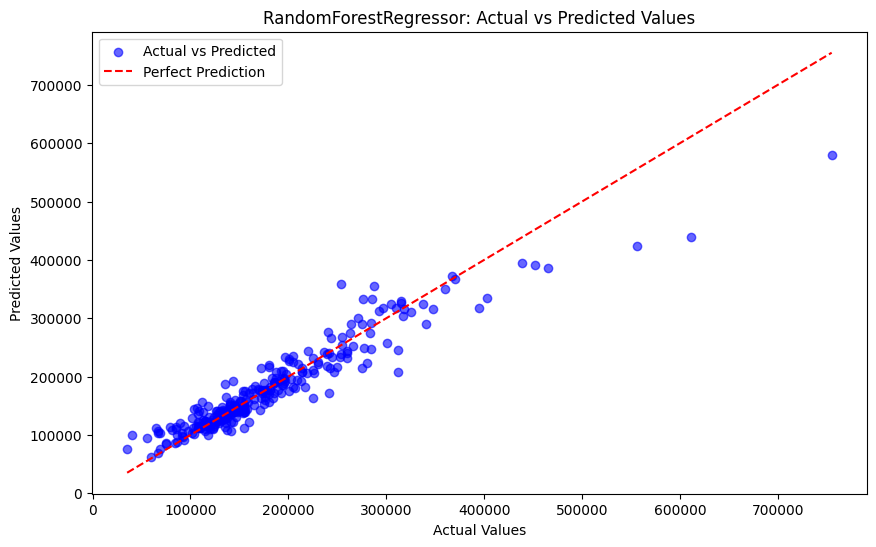

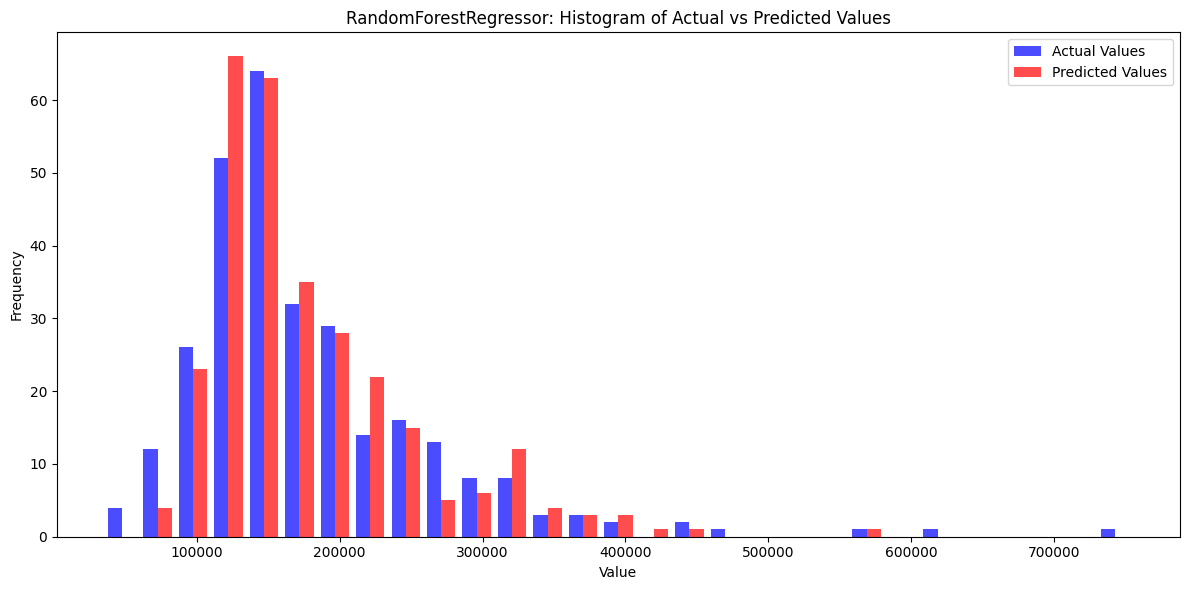

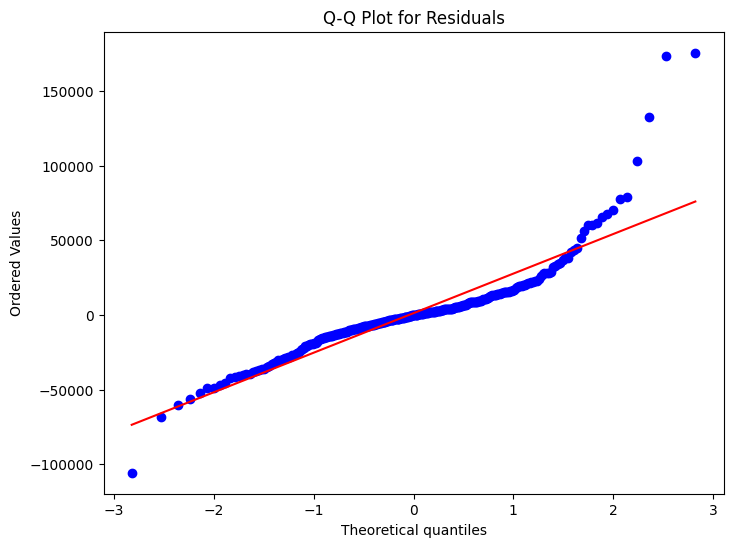

In [ ]:
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
train_evaluate_model(X_train, X_test, y_train, y_test,random_forest,False)

#Comparison - Random Forest vs Decision Tree

In [ ]:
print("DecisionTreeRegressor - Performance Metrics:\nMean Squared Error (MSE): 1612414302.06\nRoot Mean Squared Error (RMSE): 40154.88\nR² Score: 0.7898")
print("_______________________________________________________\n")
print("RandomForestRegressor - Performance Metrics:\nMean Squared Error (MSE): 831272296.89\nRoot Mean Squared Error (RMSE): 28831.79\nR² Score: 0.8916")

DecisionTreeRegressor - Performance Metrics:
Mean Squared Error (MSE): 1612414302.06
Root Mean Squared Error (RMSE): 40154.88
R² Score: 0.7898
_______________________________________________________

RandomForestRegressor - Performance Metrics:
Mean Squared Error (MSE): 831272296.89
Root Mean Squared Error (RMSE): 28831.79
R² Score: 0.8916


- conclusion: the Random Forest provides better predictions

## **6. Summary**

- Decision trees automatically capture interactions and categorical relationships.
- Random forests improve model accuracy and reduce overfitting.
- Feature importance analysis in random forests helps identify significant predictors.
- Tree-based models provide an alternative to regression for complex, non-linear problems.

---

**Next Steps:**

- Implement Decision Trees and Random Forest models in Python.
- Compare their performance to linear regression.
- Conduct feature importance analysis. (find a way to do so for each method)

